<>:89: SyntaxWarning: invalid escape sequence '\h'
<>:89: SyntaxWarning: invalid escape sequence '\h'
C:\Users\user\AppData\Local\Temp\ipykernel_18880\1418412045.py:89: SyntaxWarning: invalid escape sequence '\h'
  recognizer = ImageRecognizing("There is a cat in the picture.", "Animal Image Dataset\\validation\horse\\OIP-_KQbEV3mFTHovOMDGBF6cgHaF7.jpeg")


Tokenizer loaded successfully!
Image model loaded successfully!
Text model loaded successfully!


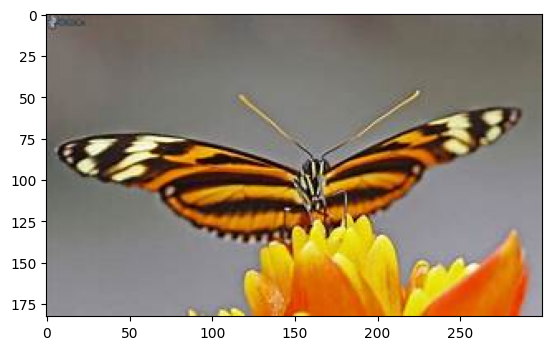

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
butterfly = 99.26%
cat = 0.00%
cow = 0.00%
dog = 0.00%
elephant = 0.00%
hen = 0.01%
horse = 0.00%
monkey = 0.00%
panda = 0.00%
sheep = 0.00%
spider = 0.73%
squirrel = 0.00%
Predicted image category: butterfly
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Predicted text category: butterfly
Result: True


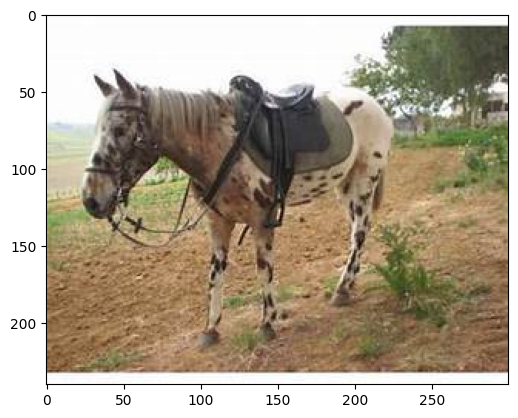

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 509ms/step
butterfly = 0.00%
cat = 0.00%
cow = 1.74%
dog = 0.02%
elephant = 4.05%
hen = 0.04%
horse = 93.21%
monkey = 0.00%
panda = 0.00%
sheep = 0.83%
spider = 0.01%
squirrel = 0.10%
Predicted image category: horse
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
Predicted text category: cat
Result: False


In [2]:
import matplotlib.pyplot as plt 
from skimage.io import imread 
from skimage.transform import resize 
import os
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.text import tokenizer_from_json
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
import json
import numpy as np
import re

DATADIR = './Animal Image Dataset/train'
IMAGE_MODEL_PATH = "animal_classifier_img.keras"
NLP_MODEL_PATH = "animal_classifier_nlp.keras"

# Get the list of categories (sorted for consistent label encoding)
Categories = sorted([name for name in os.listdir(DATADIR) if os.path.isdir(os.path.join(DATADIR, name))])

# Load the tokenizer
with open("tokenizer.json", "r", encoding="utf-8") as f:
    tokenizer_data = json.load(f)
    tokenizer = tokenizer_from_json(tokenizer_data)

print("Tokenizer loaded successfully!")

# Load the models
IMAGE_MODEL = load_model(IMAGE_MODEL_PATH)
print("Image model loaded successfully!")

TEXT_MODEL = load_model(NLP_MODEL_PATH)
print("Text model loaded successfully!")


class ImageRecognizing:
    def __init__(self, sentence, image_path):
        self.sentence = sentence
        self.image_path = image_path
        self.label_encoder = LabelEncoder()
        self.label_encoder.fit(Categories)


    def predict_image(self, model):

        img = imread(self.image_path)
        
        plt.imshow(img)
        plt.show()
        img_resize = resize(img, (150, 150, 3))
        img_array = np.expand_dims(img_resize, axis=0)  # Convert to required format
        probabilities = model.predict(img_array) 

        probabilities = model.predict(img_array)  # Get class probabilities
        predicted_class = np.argmax(probabilities)

        # Print probabilities for all categories
        for ind, val in enumerate(Categories):
            print(f'{val} = {probabilities[0][ind] * 100:.2f}%')

        print(f"Predicted image category: {Categories[predicted_class]}")
        return Categories[predicted_class]

    def predict_text(self, model):

        sequence = tokenizer.texts_to_sequences([self.sentence])
        padded = pad_sequences(sequence, maxlen=32, padding="post", truncating="post")
        prediction = model.predict(padded)
        predicted_label = np.argmax(prediction)
        predicted_category = self.label_encoder.inverse_transform([predicted_label])[0]

        print(f"Predicted text category: {predicted_category}")
        return predicted_category

    def show_result(self):
        """Compares predictions from the image and text models and returns True/False."""
        img_prediction = self.predict_image(IMAGE_MODEL)
        text_prediction = self.predict_text(TEXT_MODEL)

        is_match = img_prediction.lower() == text_prediction.lower()
        return is_match


# Example usage
recognizer = ImageRecognizing("There is a butterfly in the picture.", "Animal Image Dataset\\validation\\butterfly\\OIP-lVqi3q9whB1vSpqGD1lU7AHaEg.jpeg")
result = recognizer.show_result()
print("Result:", result)

# Example usage
recognizer = ImageRecognizing("There is a cat in the picture.", "Animal Image Dataset\\validation\horse\\OIP-_KQbEV3mFTHovOMDGBF6cgHaF7.jpeg")
result = recognizer.show_result()
print("Result:", result)
